In [ ]:
%pip install pandas matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
# ls -d -1 run-*-p-0.7
runs = [
'run-ticks-1-1-1--p-0.7',
'run-ticks-1-2-3--p-0.7',
'run-ticks-1-3-6--p-0.7',
'run-ticks-3-4-5--p-0.7',
'run-ticks-4-5-6--p-0.7',

# 'run-ticks-0.2-0.5-0.1--p-0.3',
# 'run-ticks-1-1-1--p-0.3',
# 'run-ticks-1-2-3--p-0.3',
# 'run-ticks-1-3-6--p-0.3',
# 'run-ticks-3-4-5--p-0.3',
# 'run-ticks-4-5-6--p-0.3',
]

In [ ]:
DURATION = 20
for run in runs:
    # columns = ["received", "global time", "len of queue", "logical clock time"]
    A = pd.read_csv(f"./{run}/machine_A_log.csv")
    B = pd.read_csv(f"./{run}/machine_B_log.csv")
    C = pd.read_csv(f"./{run}/machine_C_log.csv")
    
    dfs = {"A": A, "B": B, "C": C}
    split = run.split('-')
    tick_rates = {"A": split[2], "B": split[3], "C": split[4]}
    p_internal = split[-1]

    print("______________________________________________________")
    print("Run: ", run)
    tick_rates = {"A": split[2], "B": split[3], "C": split[4]}
    print("______________________________________________________")
    
    plt.title(f"Plot time for run with tick rates {tick_rates} and p_internal {p_internal}")

    for name, df in dfs.items():
        start_time = df["global time"][0]
        df["global time"] = df["global time"] - start_time
        df = df[df["global time"] < DURATION]

        plt.plot(df["global time"], df["logical clock time"], label=f"{name} (tick rate = {tick_rates[name]})") 
        
    plt.xlabel("global time")
    plt.ylabel("logical clock time")
    plt.legend()
    plt.show()
    plt.savefig(f"./{run}/logical_clock_plot")


    plt.title(f"Plot queue length for run with tick rates {tick_rates} and p_internal {p_internal}")

    for name, df in dfs.items():
        start_time = df["global time"][0]
        df["global time"] = df["global time"] - start_time
        df = df[df["global time"] < DURATION * 1000]

        plt.plot(df["global time"], df["len of queue"], label=f"{name}_queue (tick rate = {tick_rates[name]})") 
        

    plt.xlabel("global time")
    plt.ylabel("length of queue")
    plt.legend()
    plt.show()
    plt.savefig(f"./{run}/plots_q")
    
    

In [ ]:
A

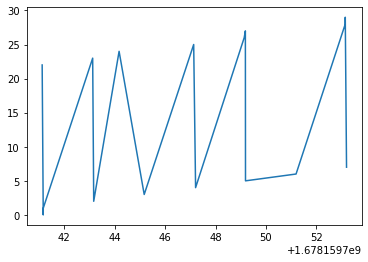

In [18]:
plt.plot(B["global time"], B["logical clock time"], label="B")